In [1]:
import numpy as np 
import pandas as pd 
import math
from datetime import datetime
import matplotlib.pyplot as plt # visualizing data
import seaborn as sns 
from collections import Counter
%matplotlib inline
from pandas import read_csv
import os
from sklearn.preprocessing import MinMaxScaler

In [2]:
print (os.getcwd())

/Users/wuyue/Desktop/analysis/code


In [3]:
file_name = "/Users/wuyue/Desktop/analysis/stock/goog.us.csv"
df = pd.read_csv(file_name)
df = df[-1500:]

print (df)

           Date     Open      High       Low    Close   Volume  OpenInt
0    2014-03-27   568.00   568.000   552.920   558.46    13052        0
1    2014-03-28   561.20   566.430   558.670   559.99    41003        0
2    2014-03-31   566.89   567.000   556.930   556.97    10772        0
3    2014-04-01   558.71   568.450   558.710   567.16     7932        0
4    2014-04-02   599.99   604.830   562.190   567.00   146697        0
5    2014-04-03   569.85   587.280   564.130   569.74  5087500        0
6    2014-04-04   574.65   577.770   543.000   543.14  6377600        0
7    2014-04-07   540.74   548.480   527.150   538.15  4368717        0
8    2014-04-08   543.07   555.000   541.610   554.90  3148563        0
9    2014-04-09   559.77   565.370   552.950   564.14  3323579        0
10   2014-04-10   564.99   565.000   539.900   540.95  4027113        0
11   2014-04-11   532.50   540.000   526.530   530.60  3915647        0
12   2014-04-14   537.74   544.100   529.560   532.52  2565391  

In [4]:
c_mm = MinMaxScaler().fit(df.iloc[:, 3:4].astype('float64'))
minmax = MinMaxScaler().fit(df.iloc[:, 1:6].astype('float64')) 
df_log = minmax.transform(df.iloc[:, 1:6].astype('float64')) 
df_log = pd.DataFrame(df_log)


print(df_log)

            0         1         2         3         4
0    0.136000  0.130374  0.120838  0.120428  0.000459
1    0.123392  0.127532  0.131469  0.123223  0.002964
2    0.133941  0.128564  0.128252  0.117705  0.000255
3    0.118775  0.131189  0.131542  0.136324  0.000000
4    0.195313  0.197046  0.137976  0.136031  0.012438
5    0.139430  0.165276  0.141563  0.141038  0.455282
6    0.148329  0.148060  0.102498  0.092436  0.570914
7    0.085456  0.095038  0.073194  0.083318  0.390858
8    0.089776  0.106841  0.099928  0.113923  0.281495
9    0.120740  0.125613  0.120893  0.130806  0.297182
10   0.130419  0.124943  0.096766  0.088434  0.360240
11   0.070178  0.079687  0.072048  0.069523  0.350249
12   0.079894  0.087109  0.077650  0.073031  0.229225
13   0.078188  0.076881  0.057128  0.080194  0.344030
14   0.089647  0.110461  0.096951  0.116919  0.435765
15   0.100419  0.096885  0.080589  0.079572  0.608110
16   0.076853  0.073713  0.070329  0.065905  0.228735
17   0.063021  0.074673  0.0

In [5]:
close_list = df["Close"].tolist()
c_max = max(close_list)
c_min = min(close_list)

In [6]:
df_log[3]

0      0.120428
1      0.123223
2      0.117705
3      0.136324
4      0.136031
5      0.141038
6      0.092436
7      0.083318
8      0.113923
9      0.130806
10     0.088434
11     0.069523
12     0.073031
13     0.080194
14     0.116919
15     0.079572
16     0.065905
17     0.077215
18     0.062836
19     0.059583
20     0.043176
21     0.044948
22     0.064224
23     0.062324
24     0.070893
25     0.064645
26     0.064425
27     0.041275
28     0.031811
29     0.033711
         ...   
886    0.841805
887    0.850064
888    0.838900
889    0.872300
890    0.887685
891    0.885164
892    0.877124
893    0.907546
894    0.905098
895    0.908332
896    0.912571
897    0.912900
898    0.914051
899    0.898776
900    0.905628
901    0.869541
902    0.873360
903    0.878458
904    0.877051
905    0.962397
906    0.958451
907    0.957592
908    0.973780
909    0.973927
910    0.986534
911    0.974511
912    0.988087
913    1.000000
914    0.983921
915    0.978476
Name: 3, Length: 916, dt

In [7]:
print (type(df_log))

<class 'pandas.core.frame.DataFrame'>


In [8]:
test_size = 30
test_times = 10

df_log_v = df_log.values

df_train = df_log_v[:-test_size, :]
df_test = df_log_v[-test_size:, :]

train_variable = df_train[:, :-1]
train_result = df_train[:, -1]
test_variable = df_test[:, :-1]
test_result = df_test[:, -1]


train_variable = train_variable.reshape((train_variable.shape[0], 1, train_variable.shape[1]))
test_variable = test_variable.reshape((test_variable.shape[0], 1, test_variable.shape[1]))
print(train_variable.shape, train_result.shape, test_variable.shape, test_result.shape)

(886, 1, 4) (886,) (30, 1, 4) (30,)


In [9]:
test_result

array([0.114272  , 0.078908  , 0.08459825, 0.10804333, 0.10440166,
       0.07912454, 0.08606128, 0.15102203, 0.11386884, 0.10411924,
       0.08087448, 0.11492594, 0.09407341, 0.11696457, 0.1047099 ,
       0.13178993, 0.10739181, 0.10777901, 0.18133125, 0.46231207,
       0.18617334, 0.11862174, 0.12239096, 0.09330833, 0.0957624 ,
       0.10010184, 0.0989708 , 0.09684199, 0.11086829, 0.06388313])

In [10]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Activation, Dropout
from sklearn.model_selection import train_test_split


training_data, validation_data, training_res, validation_res = train_test_split(train_variable, train_result, test_size = 0.1)

model = Sequential()
model.add(LSTM(64, input_shape = (training_data.shape[1], training_data.shape[2]), dropout=0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error', optimizer='adam')

model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 64)                17664     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 17,729
Trainable params: 17,729
Non-trainable params: 0
_________________________________________________________________


In [12]:
trained_model = model.fit(training_data, training_res, epochs=50, batch_size=8,\
                          validation_data=(validation_data, validation_res), shuffle=False)

Train on 797 samples, validate on 89 samples
Epoch 1/50
797/797 [==============================] - 0s 342us/step - loss: 0.0065 - val_loss: 0.0129
Epoch 2/50
797/797 [==============================] - 0s 350us/step - loss: 0.0064 - val_loss: 0.0129
Epoch 3/50
797/797 [==============================] - 0s 266us/step - loss: 0.0064 - val_loss: 0.0129
Epoch 4/50
797/797 [==============================] - 0s 274us/step - loss: 0.0064 - val_loss: 0.0129
Epoch 5/50
797/797 [==============================] - 0s 297us/step - loss: 0.0063 - val_loss: 0.0129
Epoch 6/50
797/797 [==============================] - 0s 322us/step - loss: 0.0065 - val_loss: 0.0129
Epoch 7/50
797/797 [==============================] - 0s 270us/step - loss: 0.0065 - val_loss: 0.0129
Epoch 8/50
797/797 [==============================] - 0s 265us/step - loss: 0.0064 - val_loss: 0.0129
Epoch 9/50
797/797 [==============================] - 0s 278us/step - loss: 0.0064 - val_loss: 0.0129
Epoch 10/50
797/797 [================

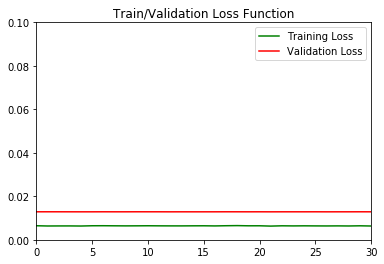

In [13]:
plt.plot(trained_model.history['loss'], color = 'g', label = 'Training Loss')
plt.plot(trained_model.history['val_loss'], color = 'r', label = 'Validation Loss')
plt.title('Train/Validation Loss Function')
plt.axis([0, 30, 0, 0.1])
plt.legend() 
plt.show()


In [14]:
x = model.predict(test_variable)


res_mm = MinMaxScaler().fit(x.astype('float64'))
pre_mm = res_mm.fit_transform(x)
prediction = c_mm.inverse_transform(pre_mm)
print (prediction)

[[ 564.0931 ]
 [ 533.9024 ]
 [ 524.733  ]
 [ 487.56   ]
 [ 506.50552]
 [ 502.56866]
 [ 564.26636]
 [ 513.34753]
 [ 531.9711 ]
 [ 549.67865]
 [ 591.6716 ]
 [ 548.1146 ]
 [ 572.41656]
 [ 554.3541 ]
 [ 554.07355]
 [ 612.43695]
 [ 539.2506 ]
 [ 531.79785]
 [ 513.39294]
 [ 756.09845]
 [ 780.0414 ]
 [ 775.78674]
 [ 822.513  ]
 [ 884.16943]
 [ 905.0916 ]
 [ 921.2104 ]
 [ 941.6497 ]
 [1028.45   ]
 [1025.8007 ]
 [ 902.51245]]


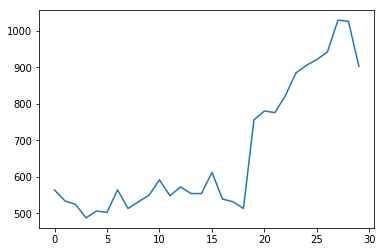

In [15]:
plt.plot(prediction)
plt.show()

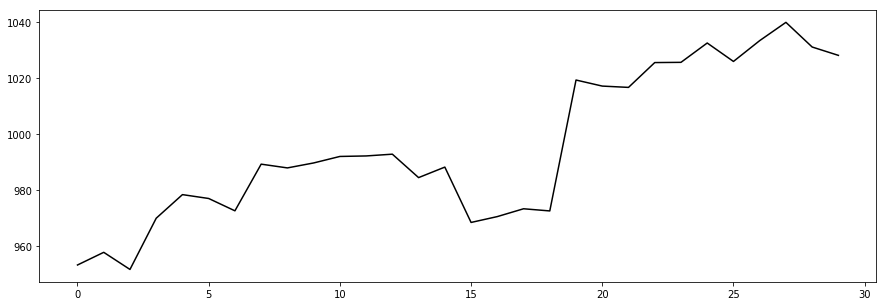

In [16]:
plt.figure(figsize = (15, 5))
plt.plot(df['Close'].iloc[-test_size:].values, label = 'true trend', c = 'black')
plt.show()

In [17]:
result = []
for i in range(test_times):
    
    print ('training %d'%(i + 1))
    trained_model = model.fit(training_data, training_res, epochs=30, batch_size=8,\
                          validation_data=(validation_data, validation_res), shuffle=False)
    
    
    x = model.predict(test_variable)


    res_mm = MinMaxScaler().fit(x.astype('float64'))
    pre_mm = res_mm.fit_transform(x)
    prediction = c_mm.inverse_transform(pre_mm)
    result.append(prediction)

training 1
Train on 797 samples, validate on 89 samples
Epoch 1/30
797/797 [==============================] - 0s 302us/step - loss: 0.0064 - val_loss: 0.0129
Epoch 2/30
797/797 [==============================] - 0s 290us/step - loss: 0.0064 - val_loss: 0.0129
Epoch 3/30
797/797 [==============================] - 0s 288us/step - loss: 0.0064 - val_loss: 0.0129
Epoch 4/30
797/797 [==============================] - 0s 295us/step - loss: 0.0064 - val_loss: 0.0129
Epoch 5/30
797/797 [==============================] - 0s 305us/step - loss: 0.0064 - val_loss: 0.0129
Epoch 6/30
797/797 [==============================] - 0s 283us/step - loss: 0.0064 - val_loss: 0.0129
Epoch 7/30
797/797 [==============================] - 0s 285us/step - loss: 0.0064 - val_loss: 0.0129
Epoch 8/30
797/797 [==============================] - 0s 283us/step - loss: 0.0064 - val_loss: 0.0129
Epoch 9/30
797/797 [==============================] - 0s 284us/step - loss: 0.0065 - val_loss: 0.0129
Epoch 10/30
797/797 [=====

797/797 [==============================] - 0s 307us/step - loss: 0.0064 - val_loss: 0.0129
Epoch 20/30
797/797 [==============================] - 0s 277us/step - loss: 0.0064 - val_loss: 0.0129
Epoch 21/30
797/797 [==============================] - 0s 345us/step - loss: 0.0065 - val_loss: 0.0129
Epoch 22/30
797/797 [==============================] - 0s 268us/step - loss: 0.0064 - val_loss: 0.0129
Epoch 23/30
797/797 [==============================] - 0s 275us/step - loss: 0.0064 - val_loss: 0.0129
Epoch 24/30
797/797 [==============================] - 0s 335us/step - loss: 0.0064 - val_loss: 0.0129
Epoch 25/30
797/797 [==============================] - 0s 276us/step - loss: 0.0063 - val_loss: 0.0129
Epoch 26/30
797/797 [==============================] - 0s 285us/step - loss: 0.0064 - val_loss: 0.0129
Epoch 27/30
797/797 [==============================] - 0s 276us/step - loss: 0.0064 - val_loss: 0.0129
Epoch 28/30
797/797 [==============================] - 0s 277us/step - loss: 0.0065 -

797/797 [==============================] - 0s 278us/step - loss: 0.0063 - val_loss: 0.0129
Epoch 8/30
797/797 [==============================] - 0s 266us/step - loss: 0.0064 - val_loss: 0.0129
Epoch 9/30
797/797 [==============================] - 0s 271us/step - loss: 0.0063 - val_loss: 0.0129
Epoch 10/30
797/797 [==============================] - 0s 276us/step - loss: 0.0064 - val_loss: 0.0129
Epoch 11/30
797/797 [==============================] - 0s 262us/step - loss: 0.0064 - val_loss: 0.0129
Epoch 12/30
797/797 [==============================] - 0s 266us/step - loss: 0.0064 - val_loss: 0.0129
Epoch 13/30
797/797 [==============================] - 0s 266us/step - loss: 0.0064 - val_loss: 0.0129
Epoch 14/30
797/797 [==============================] - 0s 264us/step - loss: 0.0064 - val_loss: 0.0129
Epoch 15/30
797/797 [==============================] - 0s 258us/step - loss: 0.0064 - val_loss: 0.0129
Epoch 16/30
797/797 [==============================] - 0s 265us/step - loss: 0.0064 - v

Epoch 26/30
797/797 [==============================] - 0s 264us/step - loss: 0.0064 - val_loss: 0.0129
Epoch 27/30
797/797 [==============================] - 0s 268us/step - loss: 0.0064 - val_loss: 0.0129
Epoch 28/30
797/797 [==============================] - 0s 266us/step - loss: 0.0064 - val_loss: 0.0129
Epoch 29/30
797/797 [==============================] - 0s 259us/step - loss: 0.0064 - val_loss: 0.0129
Epoch 30/30
797/797 [==============================] - 0s 253us/step - loss: 0.0064 - val_loss: 0.0129
training 9
Train on 797 samples, validate on 89 samples
Epoch 1/30
797/797 [==============================] - 0s 263us/step - loss: 0.0064 - val_loss: 0.0129
Epoch 2/30
797/797 [==============================] - 0s 278us/step - loss: 0.0064 - val_loss: 0.0129
Epoch 3/30
797/797 [==============================] - 0s 274us/step - loss: 0.0064 - val_loss: 0.0129
Epoch 4/30
797/797 [==============================] - 0s 274us/step - loss: 0.0064 - val_loss: 0.0129
Epoch 5/30
797/797 [=

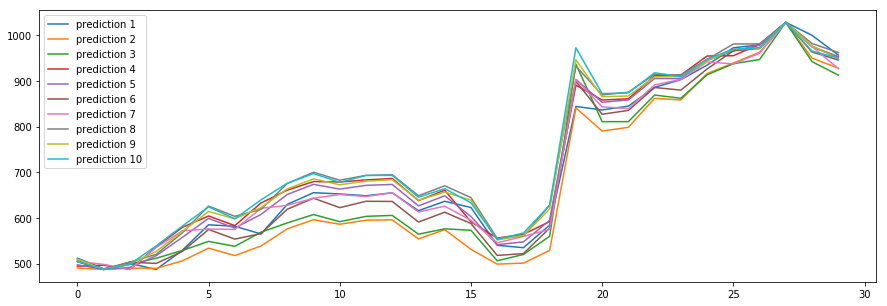

In [20]:
plt.figure(figsize = (15, 5))

for no, r in enumerate(result):
    plt.plot(r, label = 'prediction %d'%(no + 1))
    
# plt.plot(df['Close'].iloc[-test_size:].values, label = 'true trend', c = 'black')
plt.legend()
plt.show()

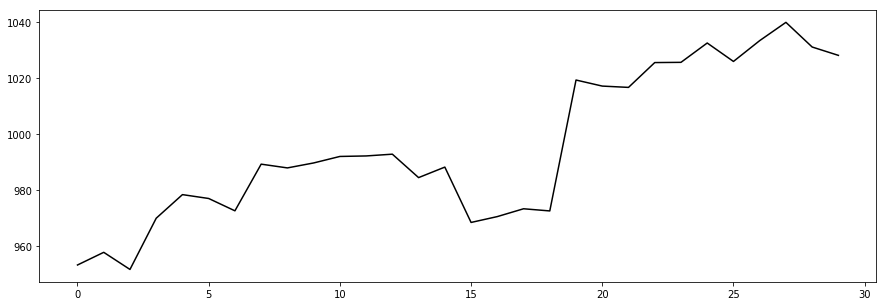

In [21]:
plt.figure(figsize = (15, 5))
plt.plot(df['Close'].iloc[-test_size:].values, label = 'true trend', c = 'black')
plt.show()